In [8]:
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, RNN, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
import matplotlib.pyplot as plt


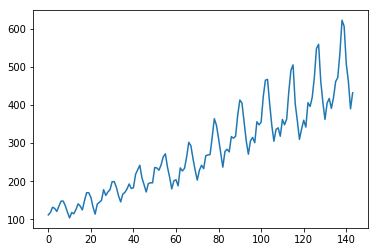

In [18]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

plt.plot(scaler.inverse_transform(dataset))
plt.show()


In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=8):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)



Epoch 1/10
91/91 [==============================] - 1s 13ms/step - loss: 0.0750
Epoch 2/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 3/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 4/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 6/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 7/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 8/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 9/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 10/10
91/91 [==============================] - 0s 5ms/step - loss: 0.0032


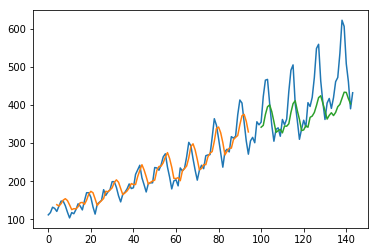

In [26]:
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

sgd = SGD(lr=0.1)
# create and fit the network
model = Sequential()
model.add(SimpleRNN(1, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(trainX, trainY, epochs=10, batch_size=1)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
